<a href="https://colab.research.google.com/github/syahvan/Image-Clustering-with-K-Means/blob/main/Image%20Clustering%20K-Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Library
import numpy as np
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import cv2
import os, glob, shutil

In [ ]:
#Mounted dataset dari drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Path dataset
input_dir = '/content/drive/MyDrive/Dataset/final'
glob_dir = input_dir + '/*.jpeg'

In [ ]:
#Image Preprocessing
images = [cv2.resize(cv2.imread(file), (224, 224)) for file in glob.glob(glob_dir)]
paths = [file for file in glob.glob(glob_dir)]
images = np.array(np.float32(images).reshape(len(images), -1)/255)

In [ ]:
len(images)

1622

In [ ]:
#Feature extraction dengan transfer learning MobileNetV2
model = tf.keras.applications.MobileNetV2(include_top=False, weights='imagenet', input_shape=(224, 224, 3))
predictions = model.predict(images.reshape(-1, 224, 224, 3))
pred_images = predictions.reshape(images.shape[0], -1)

51/51 [==============================] - 46s 874ms/step


In [ ]:
#Menentukan nilai K dengan Silhouette Method
sil = []
kl = []
kmax = 10

for k in range(2, kmax+1):
  kmeans2 = KMeans(n_clusters = k).fit(pred_images)
  labels = kmeans2.labels_
  sil.append(silhouette_score(pred_images, labels, metric = 'euclidean'))
  kl.append(k)

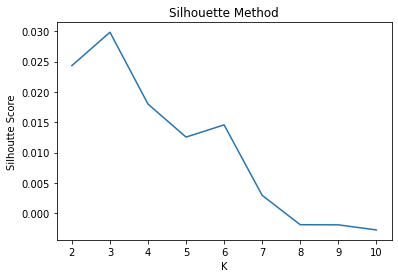

In [ ]:
plt.plot(kl, sil)
plt.ylabel('Silhoutte Score')
plt.xlabel('K')
plt.title('Silhouette Method')
plt.show()

In [ ]:
#Menentukan nilai K dengan Elbow Method
inertia = []
for k in range(2, kmax+1):
    kmeans3 = KMeans(n_clusters=k).fit(pred_images)
    inertia.append(kmeans3.inertia_)

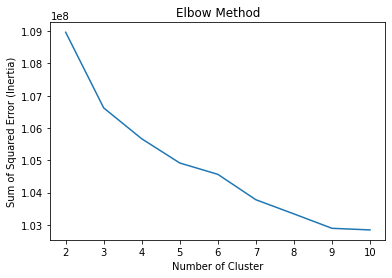

In [ ]:
plt.plot(kl, inertia)
plt.ylabel('Sum of Squared Error (Inertia)')
plt.xlabel('Number of Cluster')
plt.title('Elbow Method')
plt.show()

Pada Elbow Method, bentuk siku tidak terlalu terlihat sehingga kurang jelas berapa nilai k terbaik untuk dipilih. Pada Silhouette Method, nilai puncak terlihat jelas yaitu pada saat k = 3. Oleh karena itu, data akan dibagi menjadi 3 cluster

In [ ]:
#Membagi data menjadi 3 cluster dalam folder yang berbeda
k = 3
kmodel = KMeans(n_clusters=k, random_state=728)
kmodel.fit(pred_images)
kpredictions = kmodel.predict(pred_images)
for i in range(k):
	os.makedirs("/content/drive/MyDrive/Dataset/output/cluster" + str(i))
for i in range(len(paths)):
	shutil.copy2(paths[i], "/content/drive/MyDrive/Dataset/output/cluster"+str(kpredictions[i]))

Hasil pembagian cluster gambar dapat dilihat disini: https://drive.google.com/drive/folders/1OIK2LHU7NaMT6m7JV4VRYEgB5gMHgfxc?usp=share_link

Jika dilihat hasilnya dalam ketiga folder cluster, isi gambar pada tiap cluster:
1.   cluster0 = Hutan/Pepohonan
2.   cluster1 = Pantai
3.   cluster2 = Gunung




